<a href="https://colab.research.google.com/github/fanta0317/AI-summer-course/blob/main/%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train data= 60000
test data= 10000
x_train: (60000, 28, 28)
y_train: (60000,)


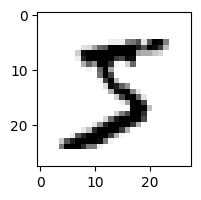

5
[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
240/240 - 4s - loss: 0.3925 - accuracy: 0.8934 - val_loss: 0.2092 - val_accuracy: 0.9394 - 4s/epoch - 16ms/step
Epoch 2/10
240/240 - 2s - loss: 0.1737 - accuracy: 0.9511 - val_loss: 0.1440 - val_accuracy: 0.9594 - 2s/epoch - 8ms/step
Epoch 3/10
24

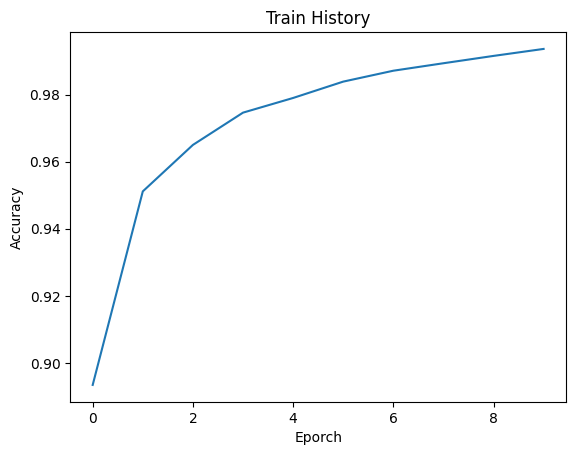

313/313 [==============================] - 1s 2ms/step
[[6.5169104e-08 2.3446749e-09 7.7927161e-06 ... 9.9978209e-01
  9.2724904e-06 1.1375230e-06]
 [2.0548244e-08 2.9966872e-05 9.9996048e-01 ... 3.3887175e-12
  3.9027423e-06 1.3064470e-12]
 [5.1915645e-06 9.9812549e-01 7.4750365e-05 ... 3.7053926e-04
  1.2430138e-03 4.3539026e-06]
 ...
 [1.2045842e-10 6.1599295e-11 1.8806344e-10 ... 8.5765799e-07
  7.7307055e-07 1.9622845e-05]
 [7.9302316e-09 3.7596832e-09 4.7676248e-11 ... 2.6355229e-09
  3.9424940e-05 2.0535916e-10]
 [2.3864404e-08 9.4761820e-12 9.9557944e-09 ... 5.9924158e-13
  1.2294322e-09 1.2525750e-11]]


In [ ]:
from keras.mixed_precision.loss_scale_optimizer import optimizer
#import  MNIST資料
from keras.datasets import mnist

#抓資料進x_train,y_train,x_test,y_test)(numpy array)
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#MNIST Data Attributes
print("train data=",len(x_train))
print("test data=",len(x_test))
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)#緯度為一，所以逗點後沒數字

#看實際資料
import matplotlib.pyplot as plt

#sub program
def plot_image(image):

  #gcf=get current figure
  fig=plt.gcf()

  #set size of figure
  fig.set_size_inches(2,2)

  #draw 黑白圖
  plt.imshow(image,cmap="binary")

  #顯示於螢幕
  plt.show()

#plot figuer
plot_image(x_train[0])
print(y_train[0])

#2維陣列改成1維
#型態轉換浮點數
x_train=x_train.reshape(60000,784).astype("float32")
x_test=x_test.reshape(10000,784).astype("float32")

#提高後續訓練model的準確度
#進行標準化
x_train=x_train/255
x_test=x_test/255
x_train[0]

#one-hot encoding
print(y_train[:5])#[5 0 4 1 9]

from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
print(y_train[:5])    #[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
             #[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
             #[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
             #[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
             #[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]



#creat MLP Model

from keras.models import Sequential
from keras.layers import Dense

#建立線性堆疊模型物件
model=Sequential()

#加入輸入層、隱藏層、輸出層
model.add(Dense(units=256,input_dim=784,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

print(model.summary())

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)


#show training result

print(train_history.history)#dic

plt.plot(train_history.history["accuracy"])
plt.title("Train History")
plt.ylabel("Accuracy")
plt.xlabel("Eporch")
plt.show()

#預測
prediction=model.predict(x_test)
print(prediction)



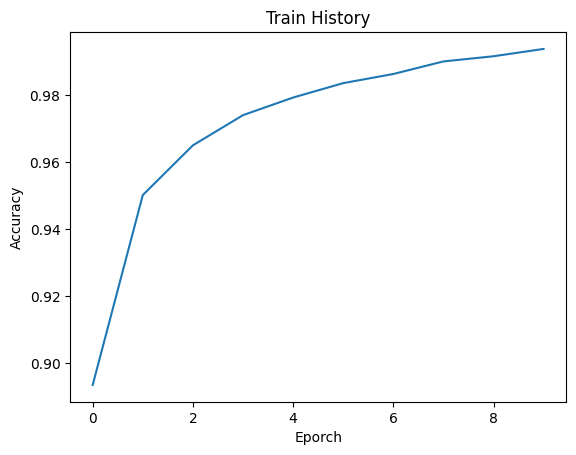

In [ ]:
#準確度圖表
plt.plot(train_history.history["accuracy"])
plt.title("Train History")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

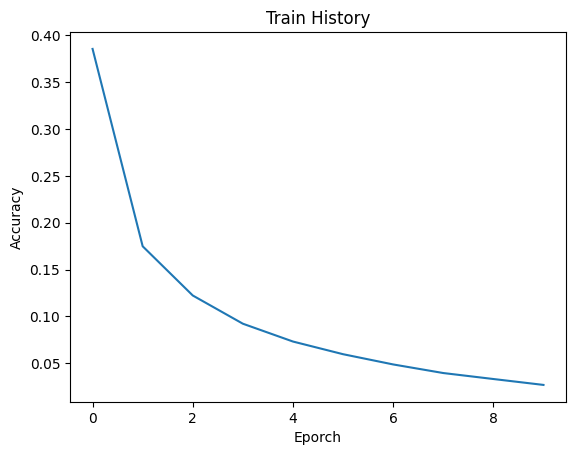

In [ ]:
#誤差圖表
plt.plot(train_history.history["loss"])
plt.title("Train History")
plt.ylabel("Loss")
plt.xlabel("Eporch")
plt.show()

In [ ]:
#預測
prediction=model.predict(x_test)
print(prediction)

313/313 [==============================] - 1s 2ms/step
[[6.5169104e-08 2.3446749e-09 7.7927161e-06 ... 9.9978209e-01
  9.2724904e-06 1.1375230e-06]
 [2.0548244e-08 2.9966872e-05 9.9996048e-01 ... 3.3887175e-12
  3.9027423e-06 1.3064470e-12]
 [5.1915645e-06 9.9812549e-01 7.4750365e-05 ... 3.7053926e-04
  1.2430138e-03 4.3539026e-06]
 ...
 [1.2045842e-10 6.1599295e-11 1.8806344e-10 ... 8.5765799e-07
  7.7307055e-07 1.9622845e-05]
 [7.9302316e-09 3.7596832e-09 4.7676248e-11 ... 2.6355229e-09
  3.9424940e-05 2.0535916e-10]
 [2.3864404e-08 9.4761820e-12 9.9557944e-09 ... 5.9924158e-13
  1.2294322e-09 1.2525750e-11]]


In [ ]:
import numpy as np

prediction=np.argmax(prediction,axis=1)#return the inidices of the max values along an axis
print(prediction)

[7 2 1 ... 4 5 6]


In [ ]:
import pandas as pd

pd.crosstab(y_test,prediction,rownames=["label"],colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,1,0,1,2,1,4,0
1,0,1121,3,2,0,1,2,0,6,0
2,2,0,1005,5,1,0,2,6,11,0
3,1,0,3,996,0,0,0,2,5,3
4,1,0,6,1,961,0,1,4,2,6
5,2,0,0,20,2,847,6,1,10,4
6,6,3,1,1,1,3,940,0,3,0
7,1,4,9,2,1,0,0,1003,3,5
8,2,0,4,5,2,2,1,2,954,2
